In [68]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [69]:
vgsales = pd.read_csv("vgsales.csv")

This video game dataset is from Kaggle. [Here](https://www.kaggle.com/gregorut/videogamesales)

## Investigation Overview
I'm most interested in figuring out how platform, publisher, and genre affect global sales.

## Dataset Overview
We have 16291 games in the dataset with and 11 features(Rank,Name,Platform,Year ,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales ,Global_Sales). Some of them are categorical. But in this exploration, we only use 8108 records and 9 features(Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales ,Global_Sales)
**Platform:**DS,PS2,PS3,Wii,360,PSP,PS,PC,XB,GBA,GC,3DS,PSV,PS4,N64,SNES,XOne,SAT,WiiU,2600,NES,GB,DC,GEN,NG,WS,SCD,3DO,TG16,PCFX,GG       
**Genre:**Action,Sports,Misc,Role-Playing,Shooter,Adventure,Racing,Platform,Simulation,Fighting,Strategy,Puzzle  
**Publisher:** Electronic Arts,Activision,Namco Bandai Games,Ubisoft,
Konami Digital Entertainment.

## Data Cleaning

In [70]:
# We are going to drop rows with null values
vgsales.dropna(inplace = True)

In [71]:
#Since there are too many publisher names, we are only interested in finding the top 10 publishers that have the most sales.
publisher_names = vgsales.Publisher.value_counts().head(10).index.tolist()

In [72]:
# Drop all non top 10 publishers
vgsales = vgsales.drop(vgsales[~vgsales.Publisher.isin(publisher_names)].index)

In [73]:
# We're also not interested in year and rank so we will drop this column
vgsales = vgsales.drop(["Rank","Year"],axis=1)

## Distribution of Global Prices
The graph is right skewed.It suggests that most games have a global sales between 0.1 and 1 dollar. The higher the global sales the less number of games.

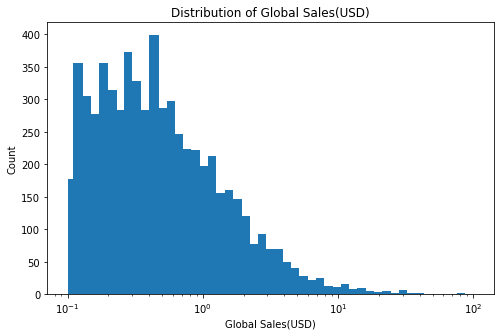

In [74]:
# there's a long tail in the distribution, so let's put it on a log scale instead
bins = np.logspace(1,4,dtype="int")/100
plt.figure(figsize=[8,5])
plt.hist(data = vgsales, x = 'Global_Sales', bins = bins)
plt.xscale('log')
plt.xlabel('Global Sales(USD)')
plt.ylabel("Count")
plt.title("Distribution of Global Sales(USD)")
plt.show()

## Distribution of Platform
Games favors certian platforms. PS2, DS, and PS3 are the most popular platforms.

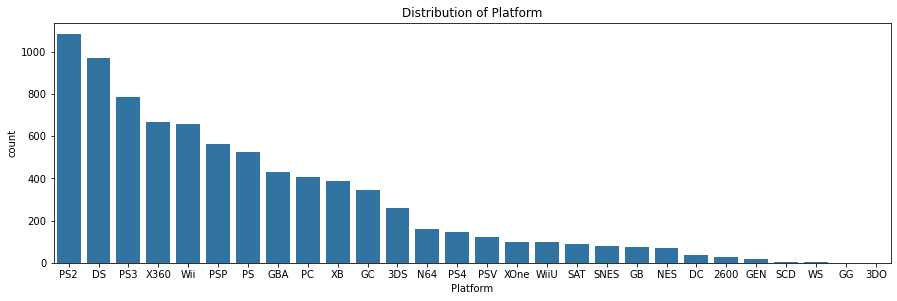

In [91]:
# let's plot platform, publisher, and genre together to get an idea of each variable's distribution.
plt.figure(figsize=(15,15))
ax = plt.subplot(3, 1, 1)
default_color = sb.color_palette()[0]
chart=sb.countplot(data = vgsales, x = 'Platform',color = default_color,order=vgsales['Platform'].value_counts().index)
chart.set_title("Distribution of Platform");

## Distribution of Genre
In the genre graph, we can see there are more action and sport games than other genres. It is about 2 times more.

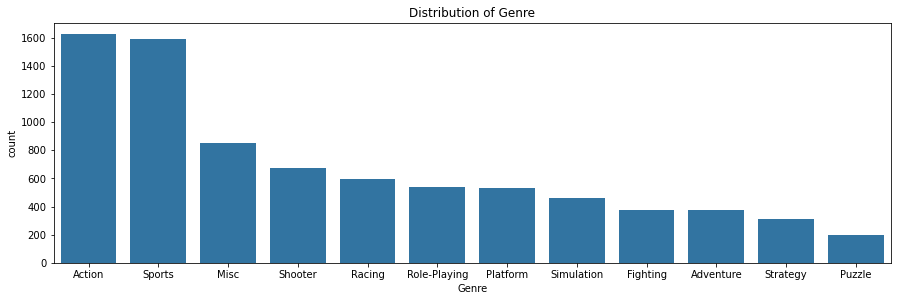

In [90]:
plt.figure(figsize=(15,15))
ax = plt.subplot(3, 1, 2)
chart=sb.countplot(data = vgsales, x = 'Genre', color = default_color,order=vgsales['Genre'].value_counts().index)
chart.set_title("Distribution of Genre");


## Distribution of Publisher
In the publisher graph, we can see that Electronic Arts make most number of games and Take-Two Interactive make the least number of games. The rest of publishers make similar number of games.

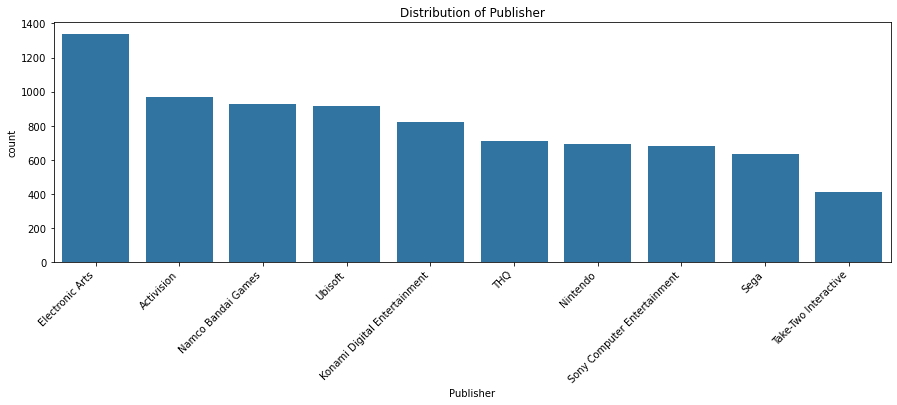

In [77]:
plt.figure(figsize=(15,15))
ax = plt.subplot(3, 1, 3)
chart = sb.countplot(data = vgsales, x = 'Publisher', color = default_color,order=vgsales['Publisher'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_title("Distribution of Publisher")
plt.show()

## Publisher vs. Global Sales
Global sales medians do not vary much by publishers. They all share similar median. However, they have quite different maximum value and outliers.

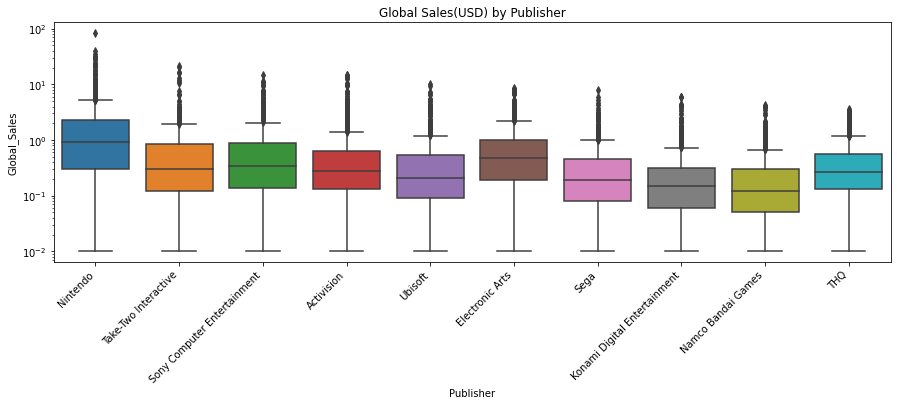

In [78]:
# Let's take a look at how different publishers, genres, and platforms correlated with sales.
plt.figure(figsize=(15,15))

# Plublisher vs Global Sales
ax = plt.subplot(3, 1, 1)
chart=sb.boxplot( x=vgsales["Publisher"], y=vgsales["Global_Sales"])
plt.title("Global Sales(USD) by Publisher")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.yscale('log')




## Genre vs. Global Sales
Global sales median do not vary much by genre. They all share similar median. Their maximum values and outliers are similar too compared to the other two graphs.

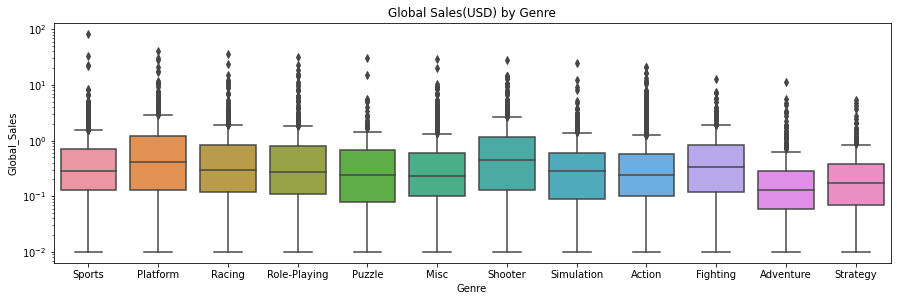

In [79]:
# Genre vs Global Sales
plt.figure(figsize=(15,15))
ax = plt.subplot(3, 1, 2)
sb.boxplot( x=vgsales["Genre"], y=vgsales["Global_Sales"] )
plt.title("Global Sales(USD) by Genre")
plt.yscale('log')

## Platform vs. Global Sales
Global sales medians and maximum values vary much by platform. They have similar ranges for outliers. 

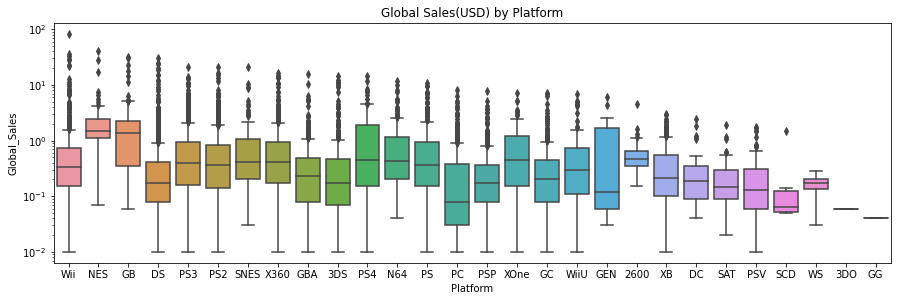

In [80]:
plt.figure(figsize=(15,15))
# Platform vs Global Sales
ax = plt.subplot(3, 1, 3)
sb.boxplot( x=vgsales["Platform"], y=vgsales["Global_Sales"] )
plt.title("Global Sales(USD) by Platform")
plt.yscale('log')

## Global Sales by Publisher and Platform
Each publisher have their strength on different platforms except Nintendo. Nintendo does not have obvious weakness. Its global sales is relatively evenly ditributed across platforms.

In [81]:
pub_plat =pd.pivot_table(vgsales, index=['Publisher','Platform'],values=['Global_Sales'],aggfunc=np.sum)

In [82]:
pub_plat.reset_index(inplace=True)

In [83]:
pub_plat = pub_plat.pivot('Publisher', 'Platform', 'Global_Sales') 

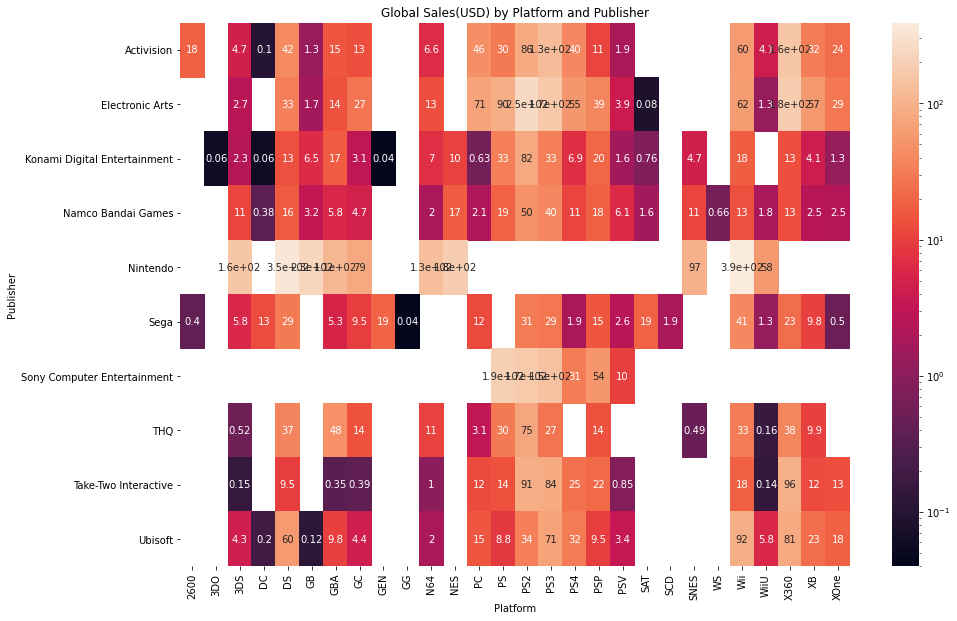

In [84]:
plt.figure(figsize=(15,10))
sb.heatmap(pub_plat,annot=True,norm=LogNorm())
plt.title("Global Sales(USD) by Platform and Publisher")
plt.show()

In [85]:
pub_gen =pd.pivot_table(vgsales, index=['Publisher','Genre'],values=['Global_Sales'],aggfunc=np.sum)
pub_gen.reset_index(inplace=True)

## Global Sales by Publisher and Genre
Each publisher have their strength on different genres. Take-Two interactive has high global sales in action and does poorly in fighting and puzzle. 

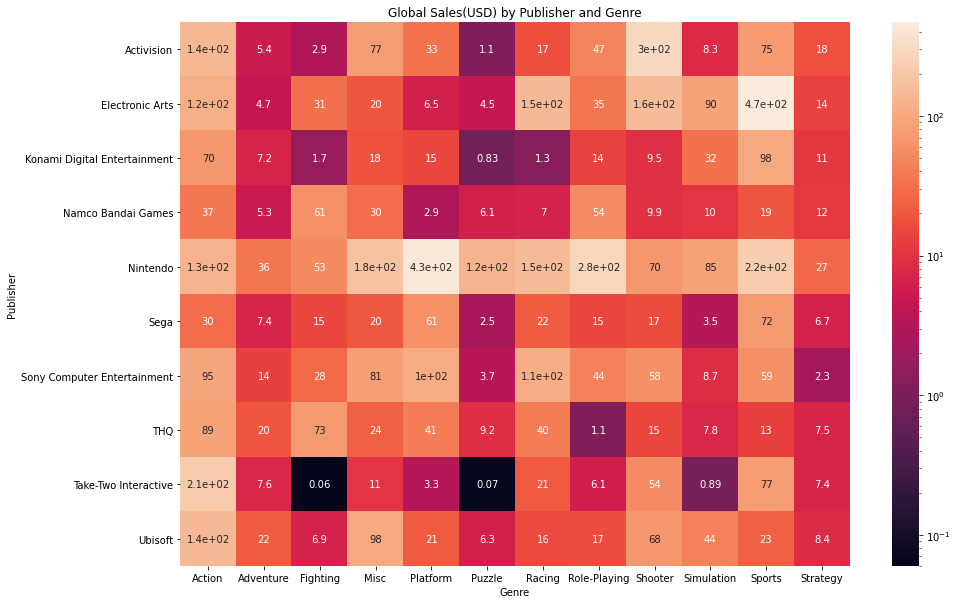

In [86]:
plt.figure(figsize=(15,10))
pub_gen = pub_gen.pivot('Publisher', 'Genre', 'Global_Sales') 
plt.title("Global Sales(USD) by Publisher and Genre")
sb.heatmap(pub_gen,annot=True,norm=LogNorm())
plt.show()

In [87]:
plat_gen =pd.pivot_table(vgsales, index=['Platform','Genre'],values=['Global_Sales'],aggfunc=np.sum)
plat_gen.reset_index(inplace=True)

In [88]:
plat_gen = plat_gen.pivot('Platform', 'Genre', 'Global_Sales') 

## Global Sales by Platform and Genre
Each platform have their strength on different genres. The strengh is obvious when it comes to certian genres. For example, action games are mostly played on PS2, PS3, and X360.

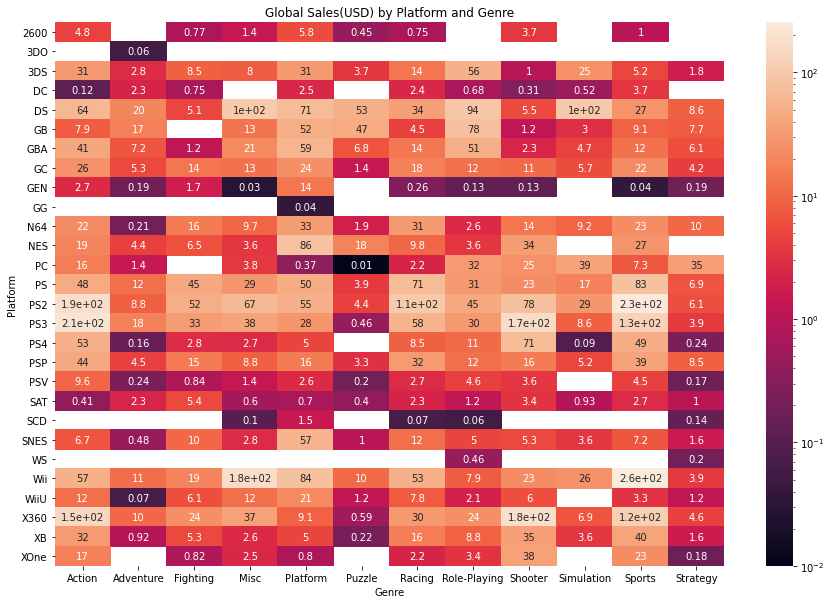

In [89]:
plt.figure(figsize=(15,10))
sb.heatmap(plat_gen,annot=True,norm=LogNorm())
plt.title("Global Sales(USD) by Platform and Genre")
plt.show()